![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Contours**

####**In this lesson we'll learn:**
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-21 04:26:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.162
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.1MB/s    in 2.2s    

2023-05-21 04:26:05 (13.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()


## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

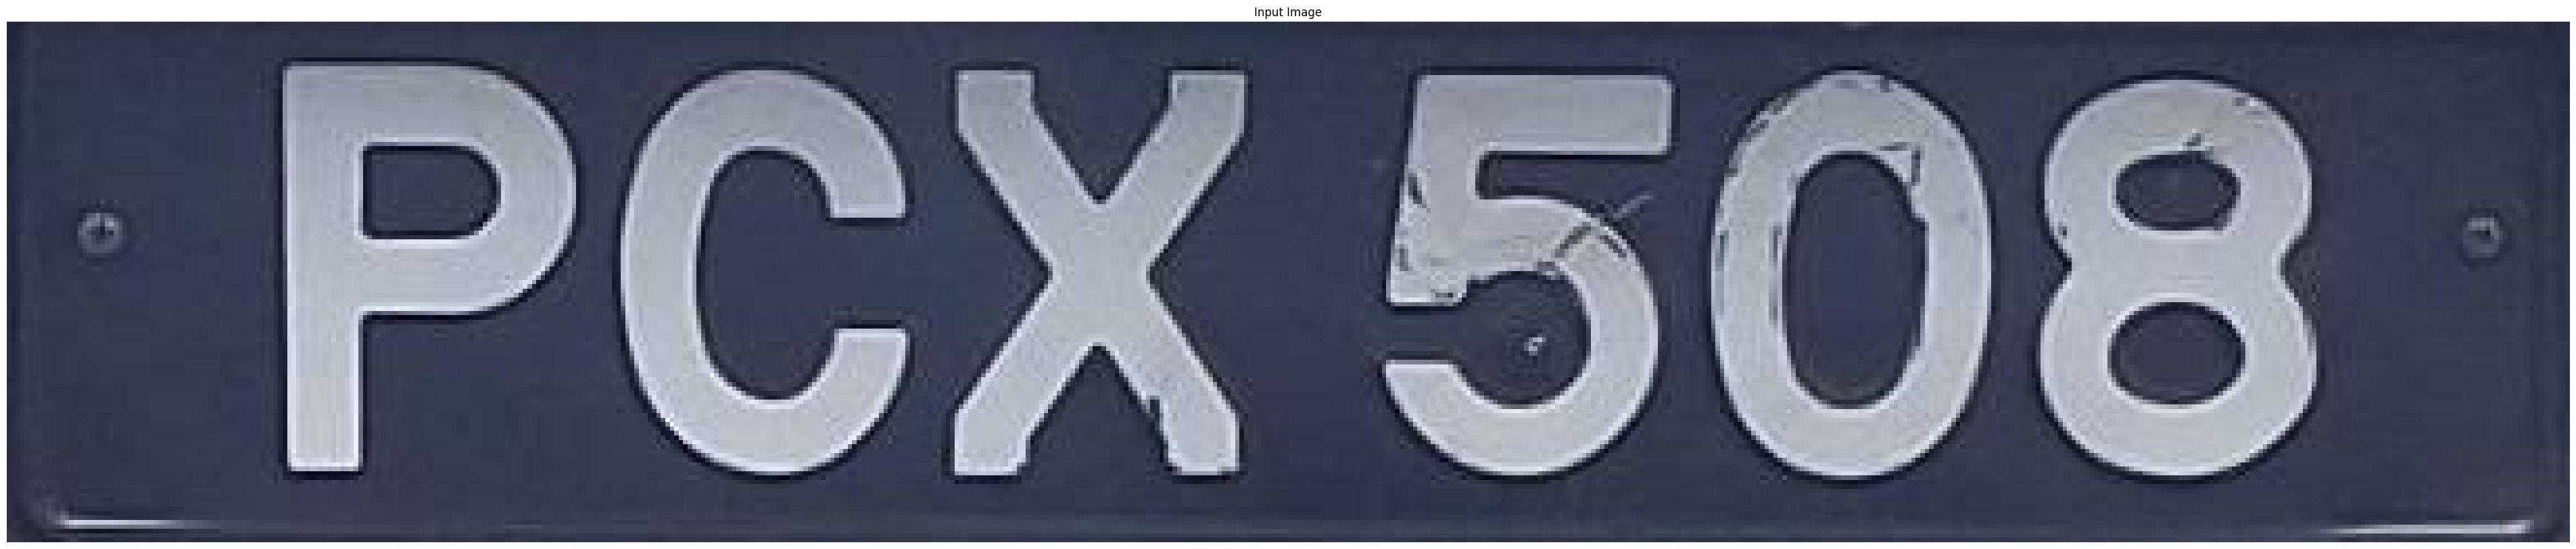

In [3]:
image = cv2.imread('images/LP.jpg')
imshow('Input Image', image)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line




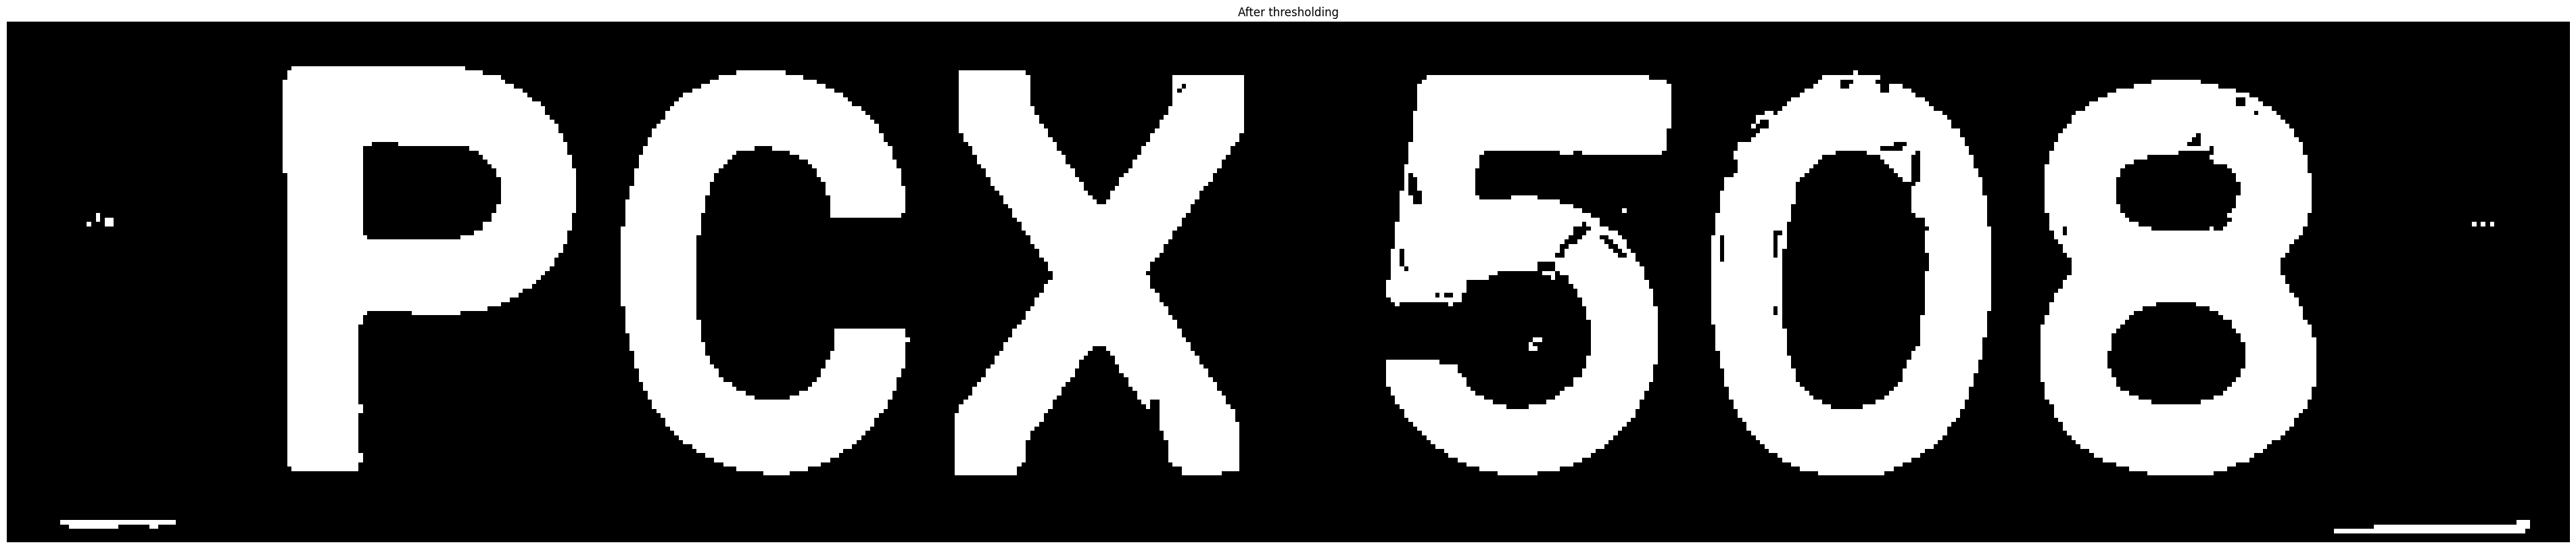

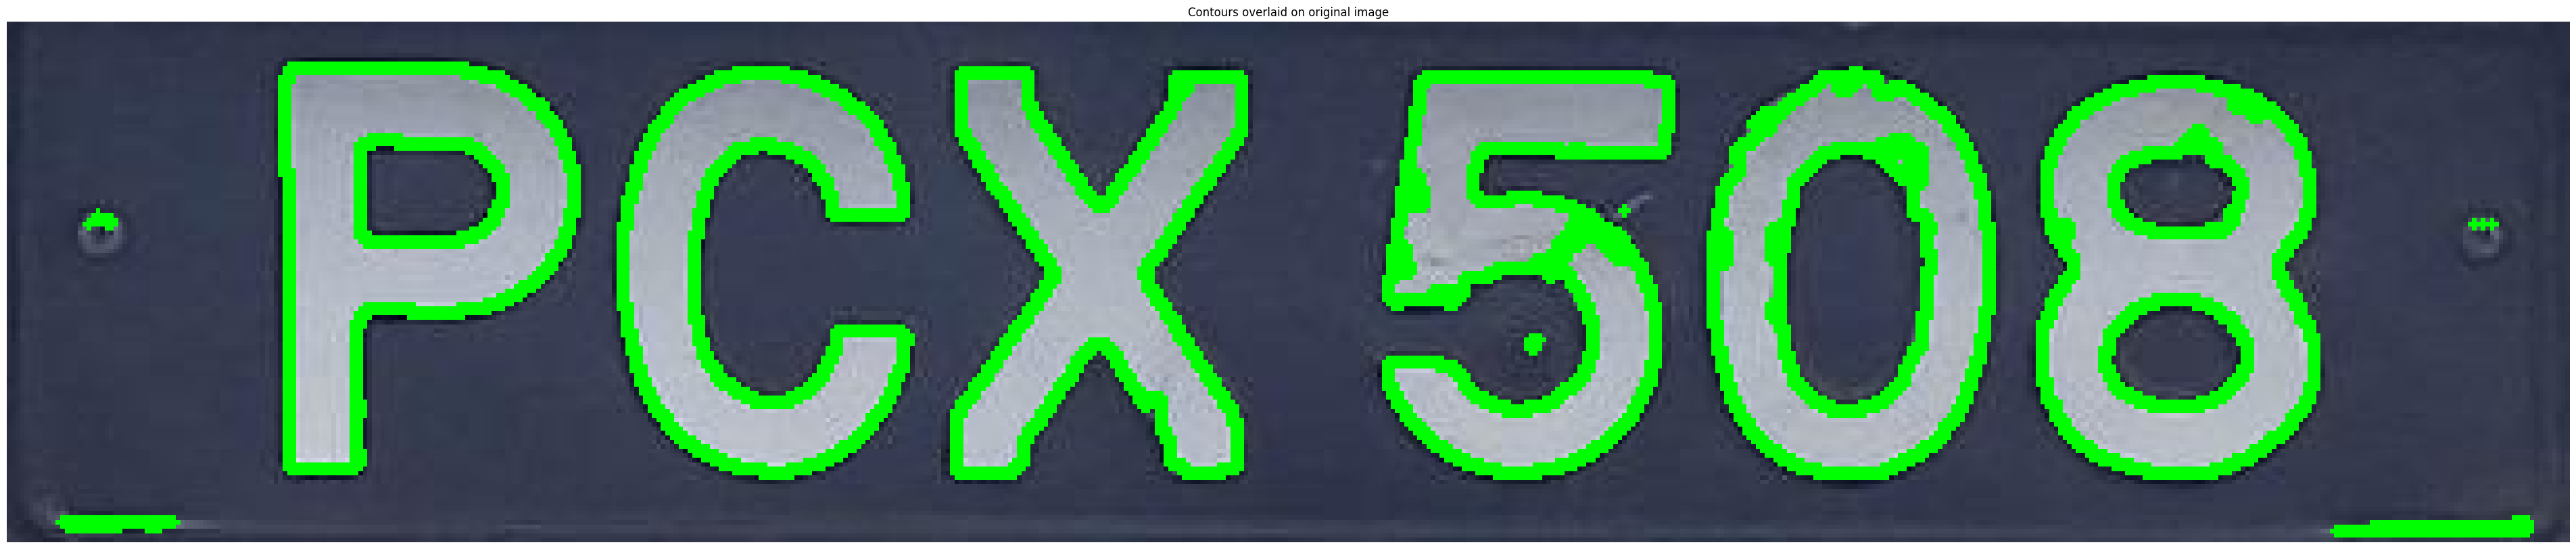

Number of Contours found = 38


In [4]:
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


In [5]:
shape = [len(a) for a in contours]
shape

[87,
 50,
 7,
 6,
 80,
 6,
 4,
 4,
 10,
 14,
 14,
 15,
 6,
 1,
 1,
 1,
 21,
 1,
 4,
 2,
 1,
 17,
 155,
 75,
 14,
 92,
 10,
 4,
 8,
 4,
 4,
 236,
 9,
 426,
 241,
 358,
 347,
 272]

#### **What happens if we don't threshold? Bad things..**

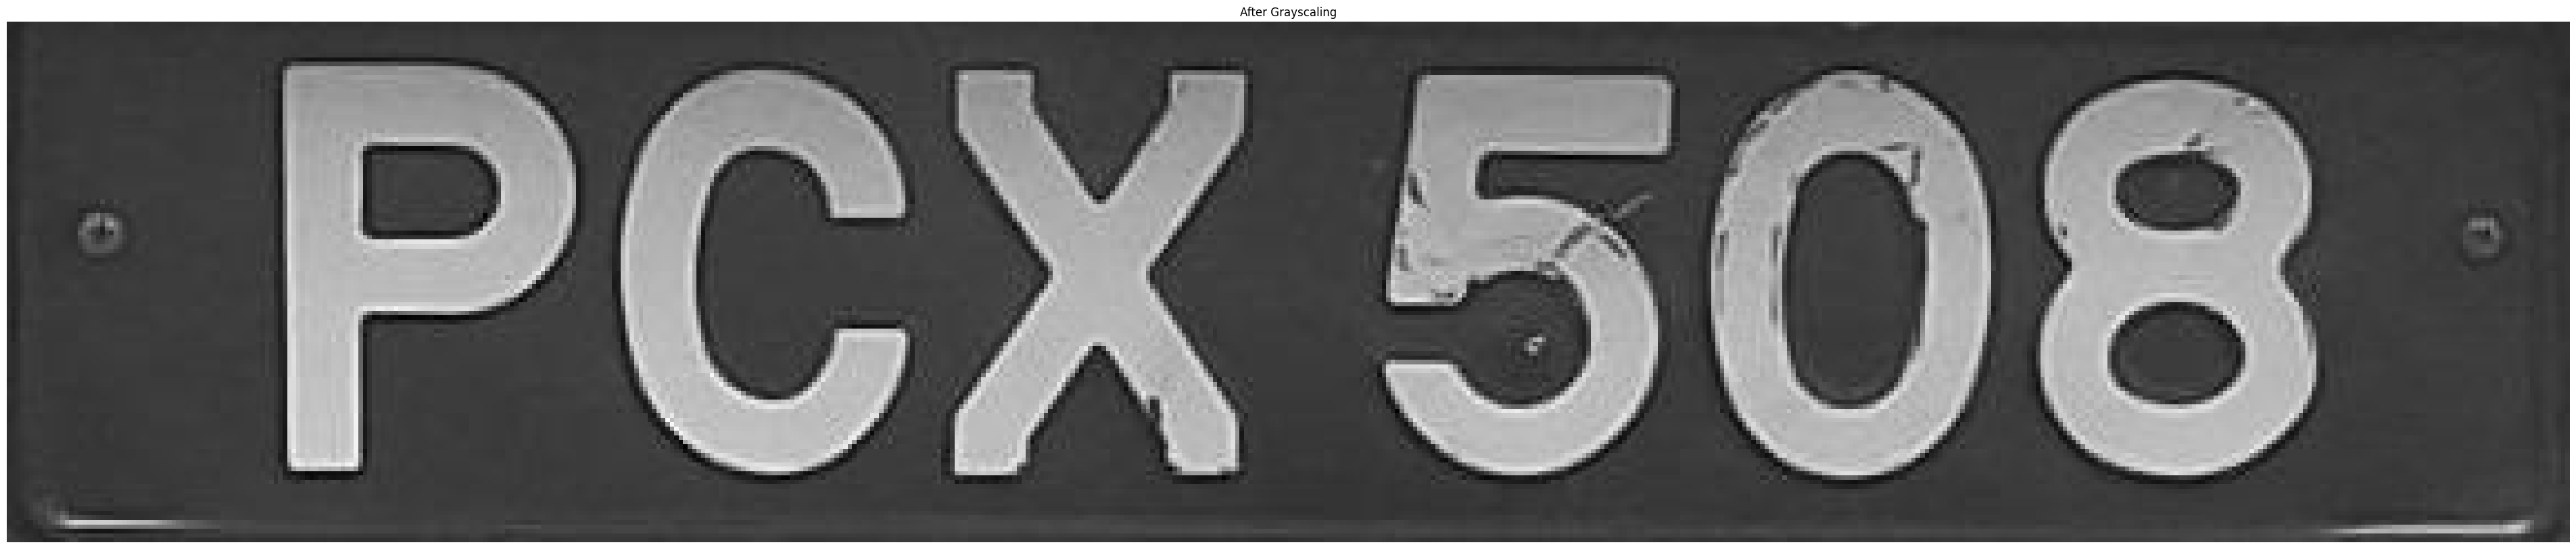

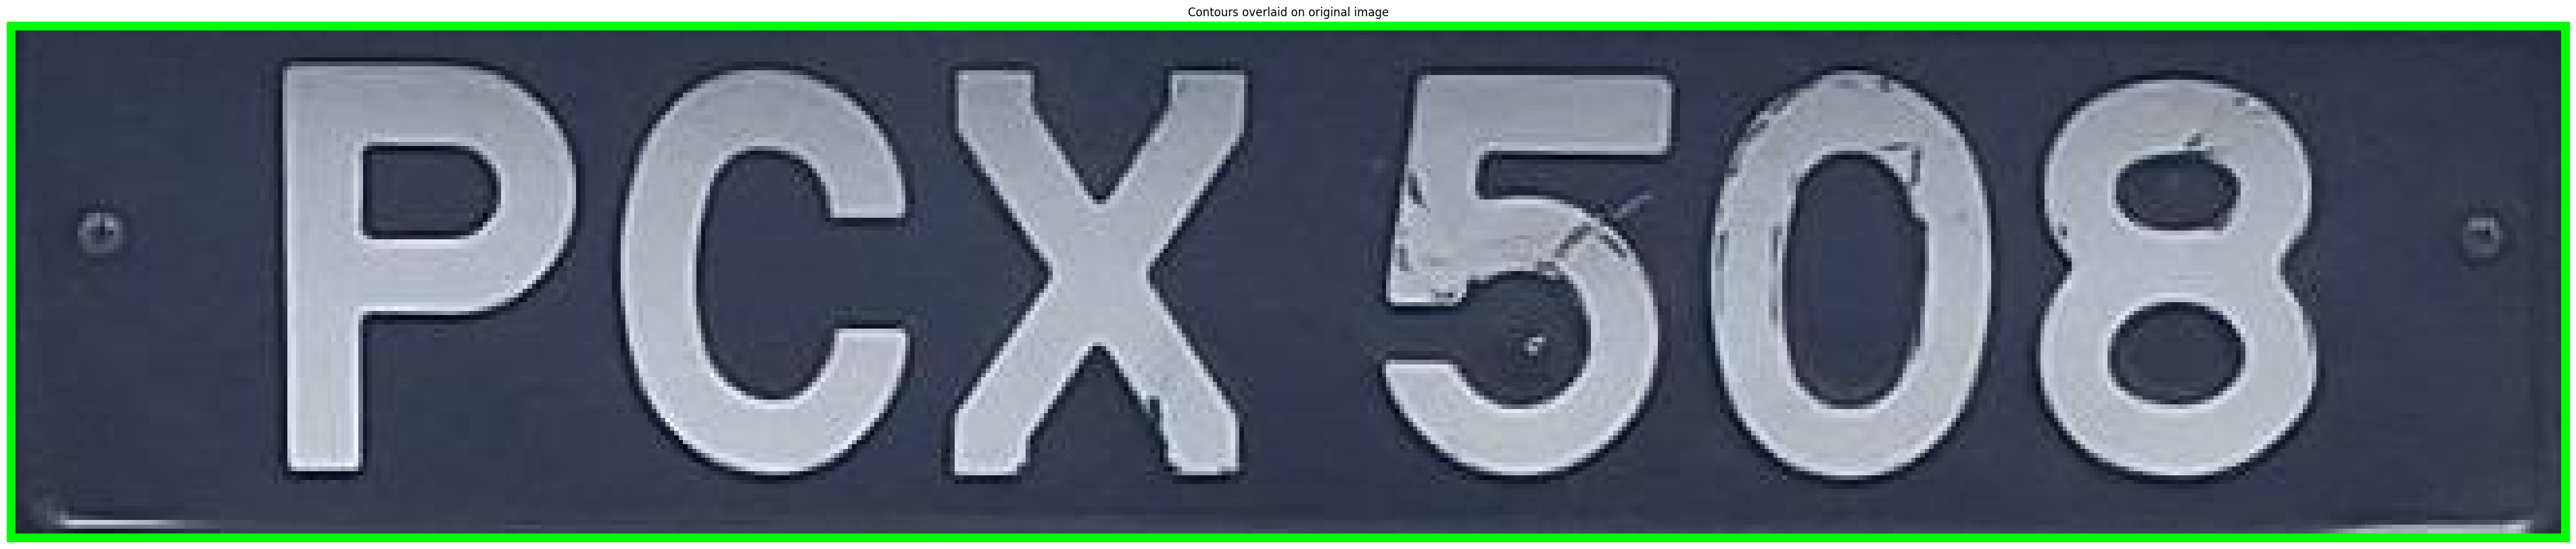

Number of Contours found = 1


In [6]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

# **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

#### **We can use Canny Edges instead of Thresholding**

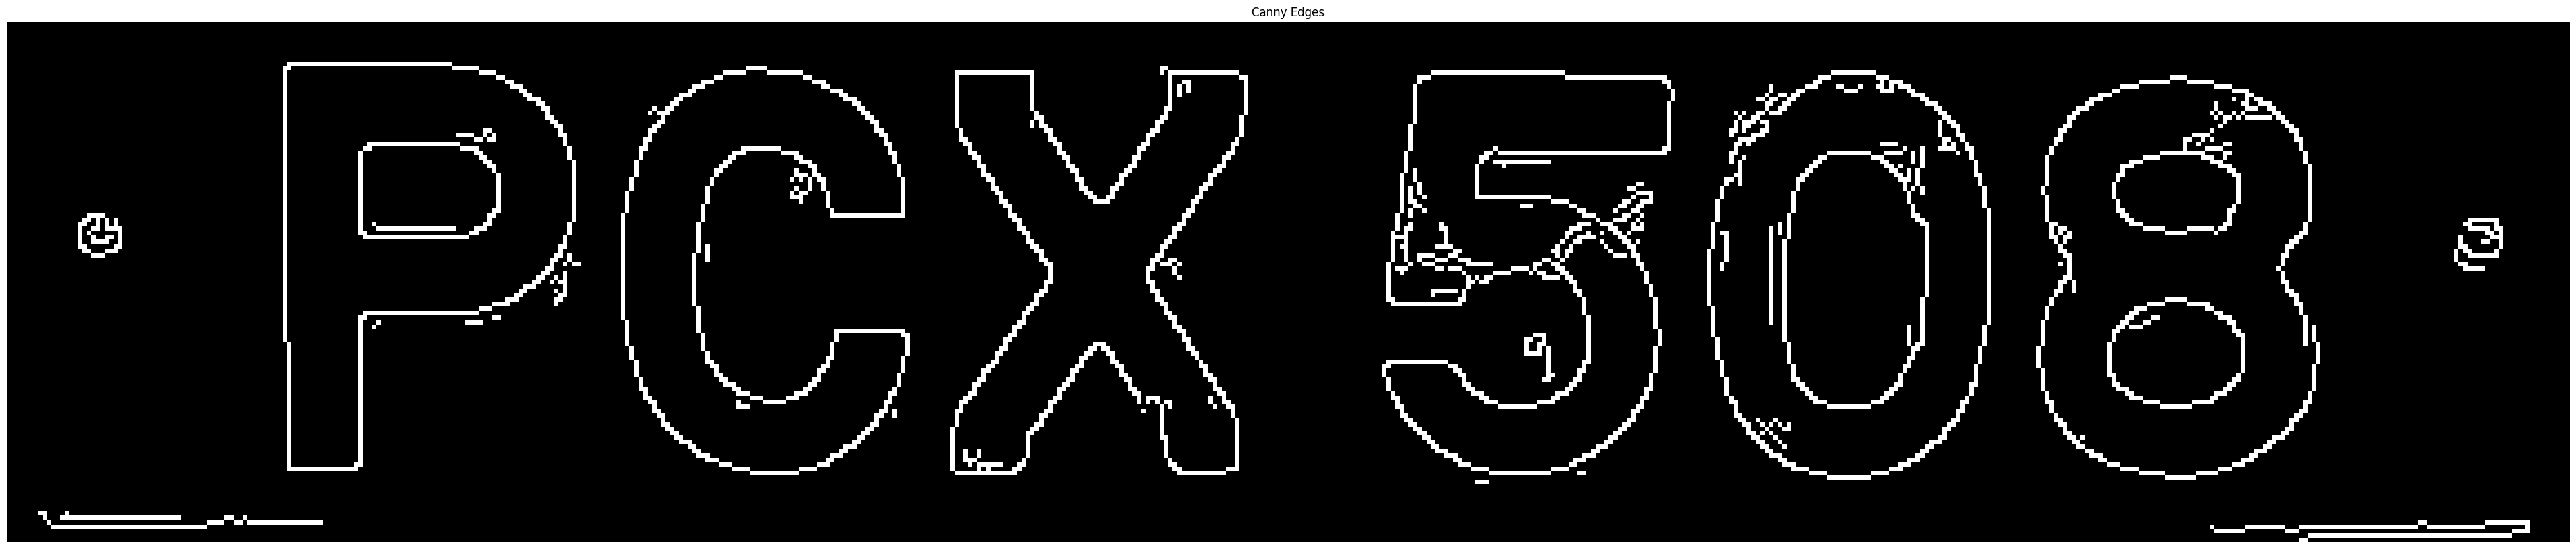

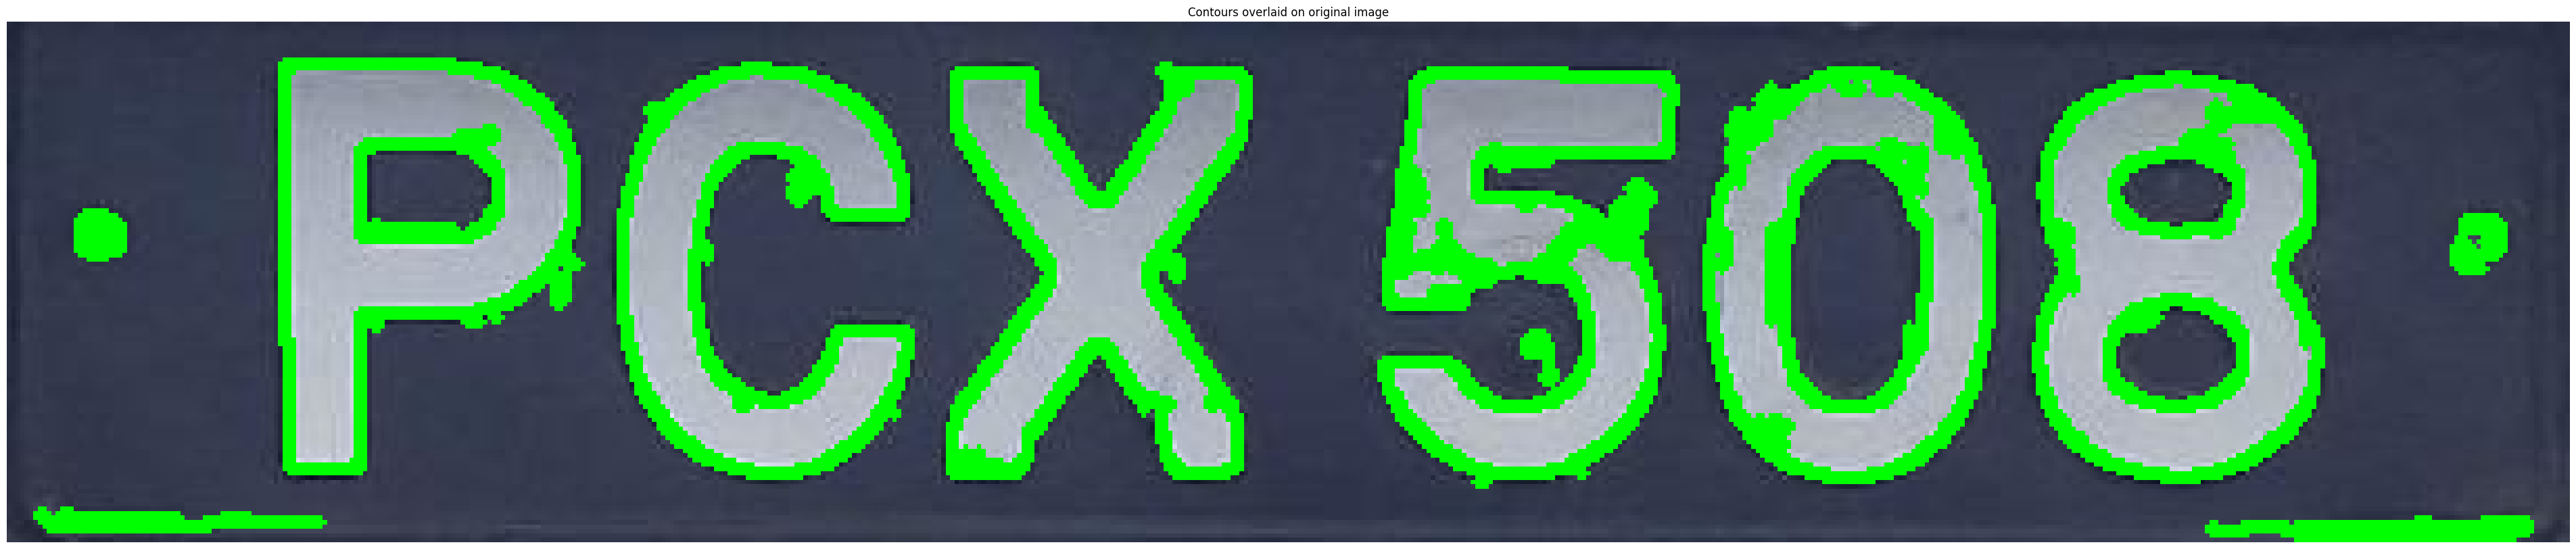

Number of Contours found = 77


In [7]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

# **Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

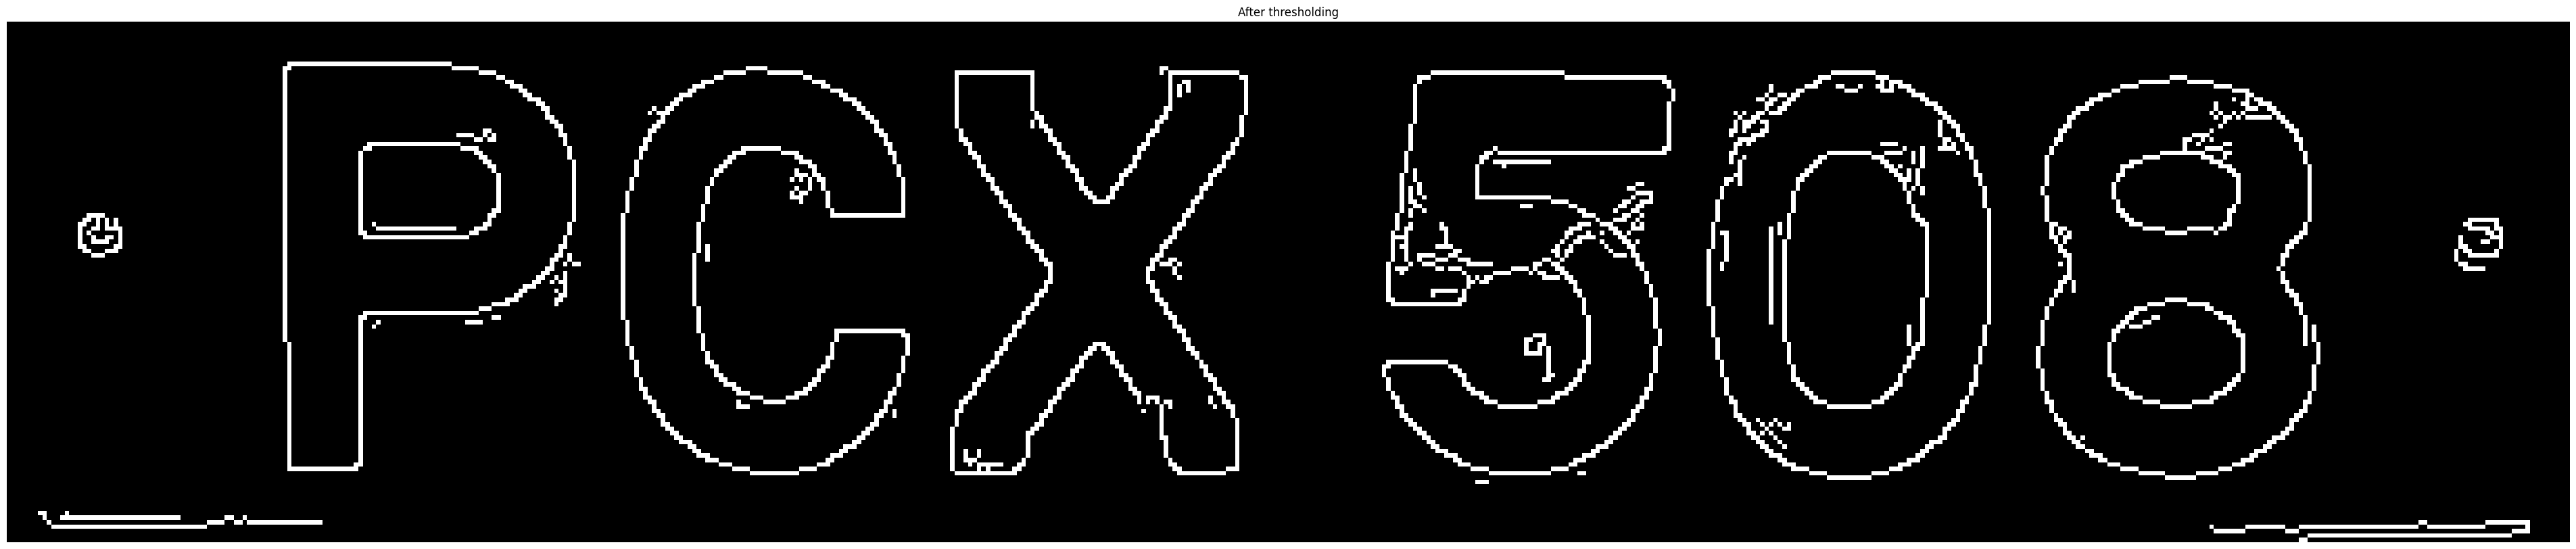

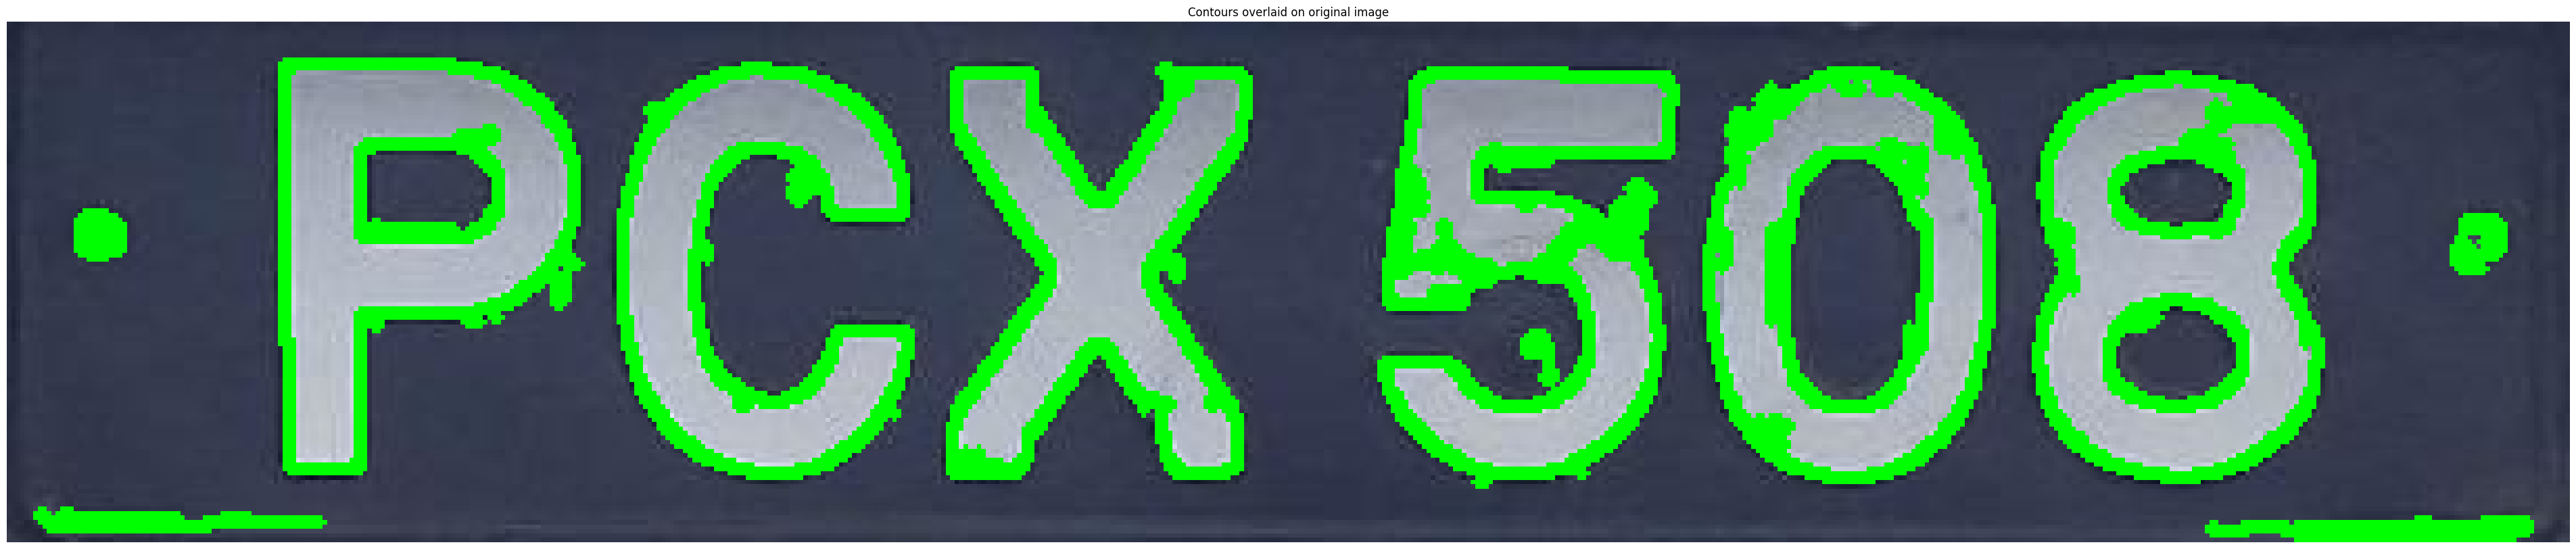

Number of Contours found = 77
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [40 38 -1 -1]
  [41 39 -1 -1]
  [42 40 -1 -1]
  [43 41 -1 -1]
  [44 42 -1 -1]
  [45 43 -1 -1]
  [46 44 -1 -1]
  [47 45 -1 -1]
  [48 46 -1 -1]
  [49 47 -1 -1]
  [50 48 -1 -1]
  [51 49 -1 -1]
  [52 50 -1 -1]
  [53 51 -1 -1]
  [54 52 -1 -1]
  [55 53 -1 -1]
  [56 54 -1 -1]
  [57 55 -1 -1]
  [58 56 -1 -1]
  [59 57 -1 -1]
  [60 58 -1 -1]
  [61 59 -

In [8]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

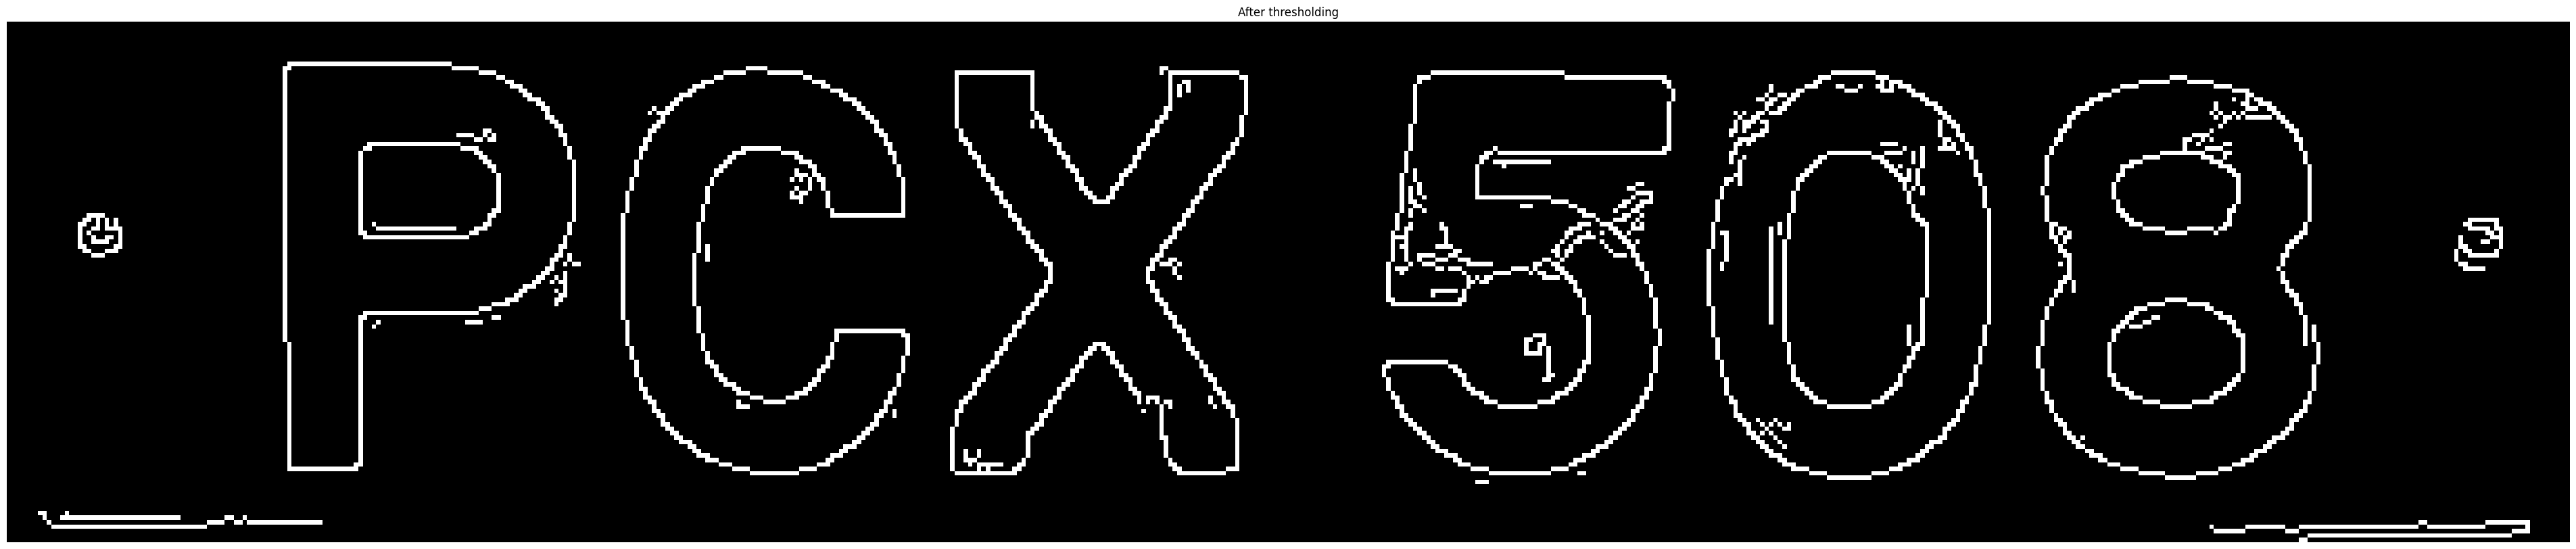

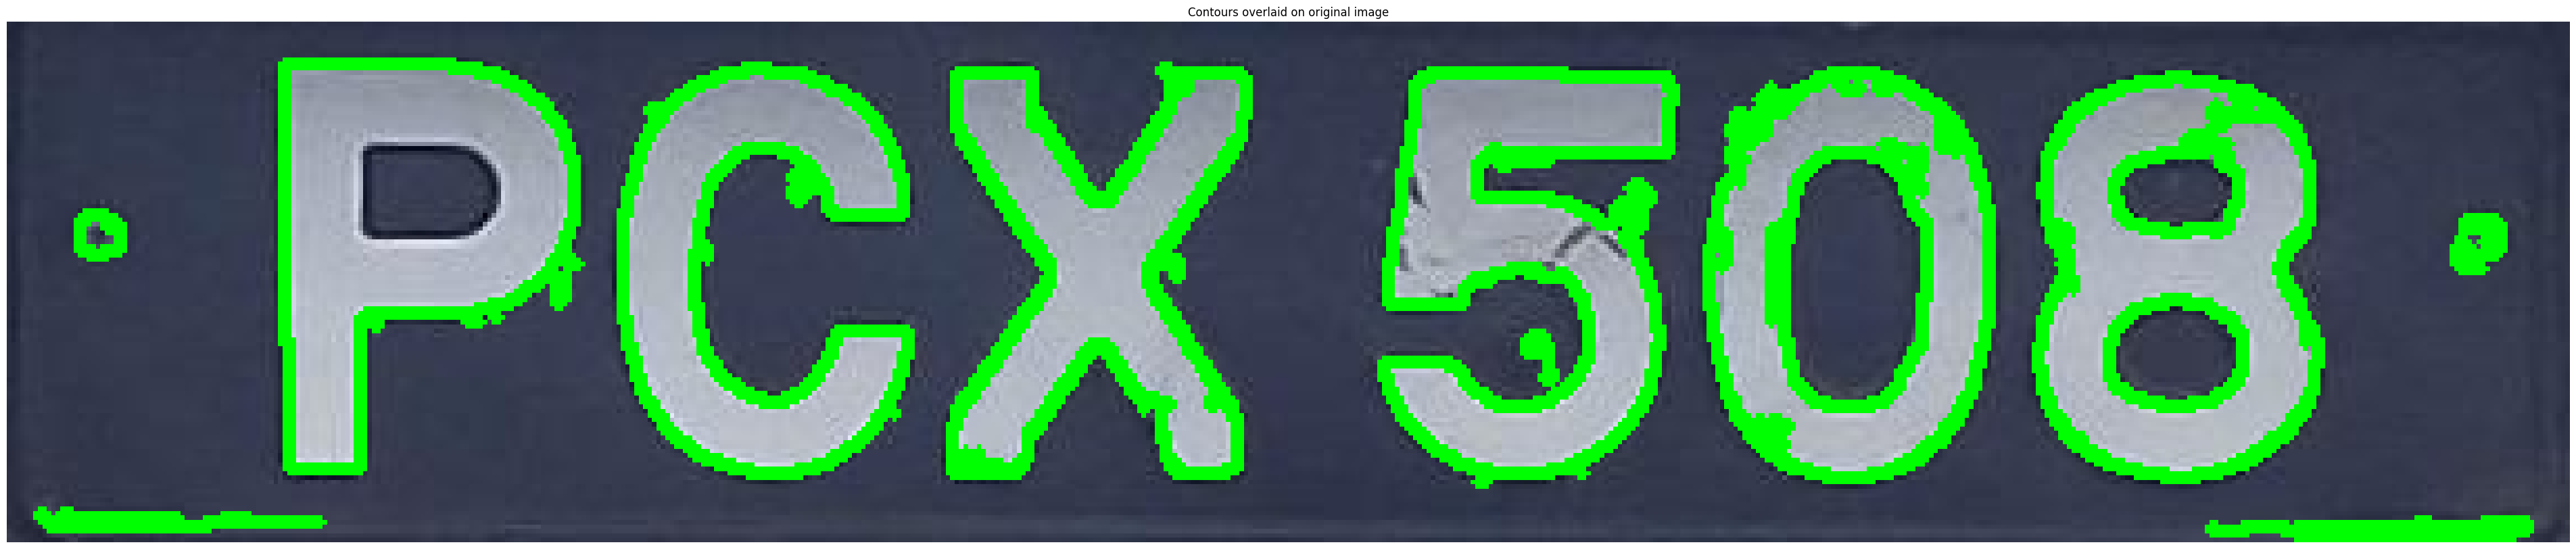

Number of Contours found = 36
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [-1 34 -1 -1]]]


In [9]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

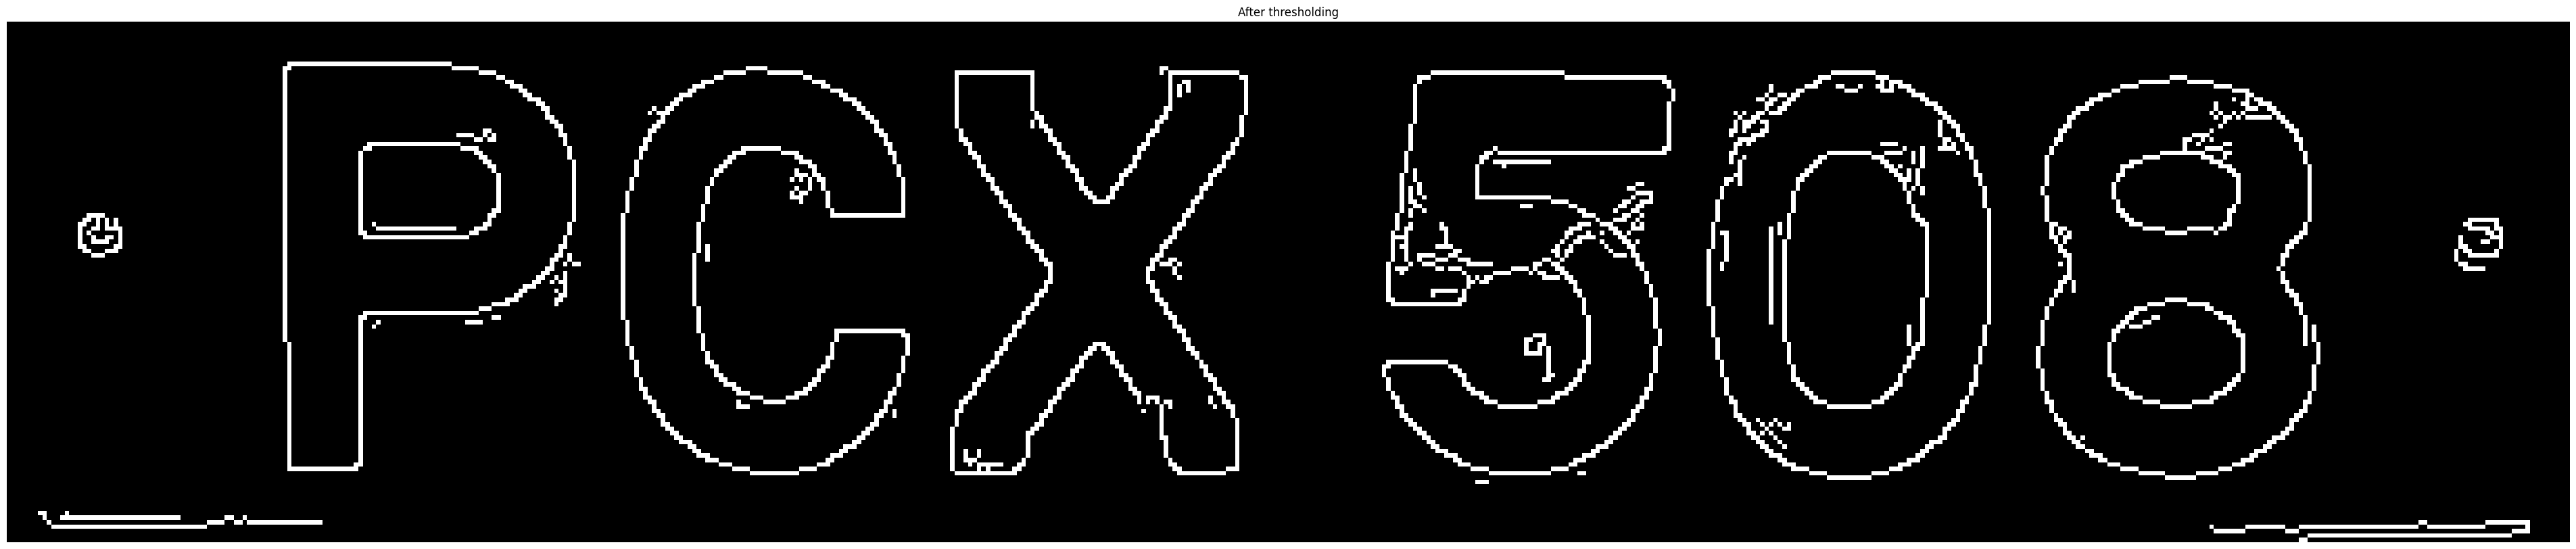

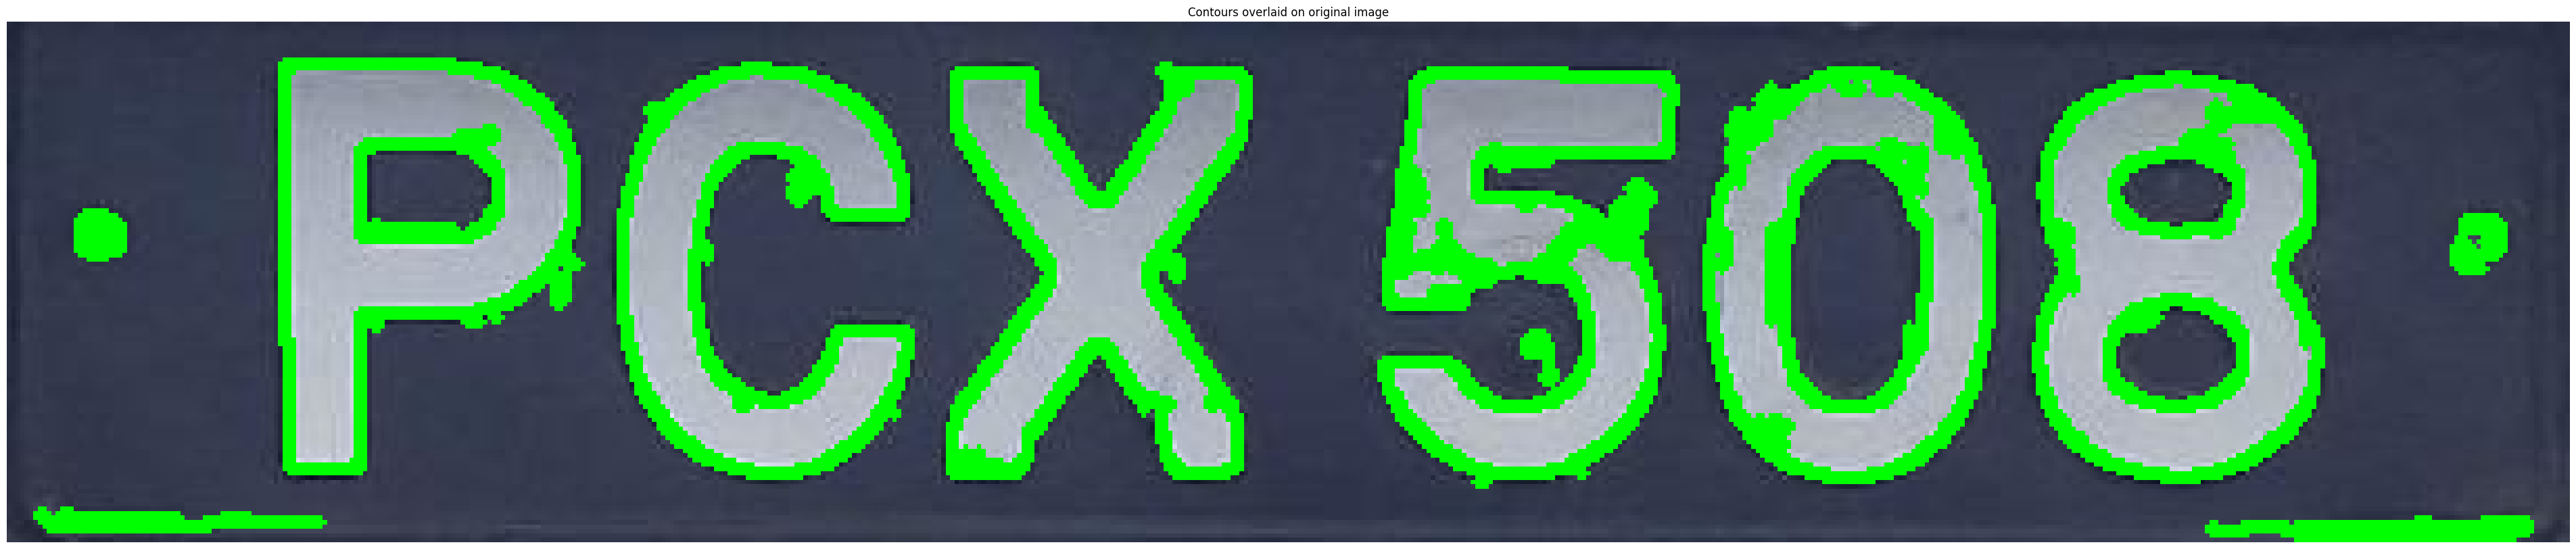

Number of Contours found = 77
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [11  8 10 -1]
  [-1 -1 -1  9]
  [12  9 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [16 13 15 -1]
  [-1 -1 -1 14]
  [17 14 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [28 25 27 -1]
  [-1 -1 -1 26]
  [29 26 -1 -1]
  [32 28 30 -1]
  [31 -1 -1 29]
  [-1 30 -1 29]
  [34 29 33 -1]
  [-1 -1 -1 32]
  [35 32 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [41 38 40 -1]
  [-1 -1 -1 39]
  [42 39 -1 -1]
  [44 41 43 -1]
  [-1 -1 -1 42]
  [47 42 45 -1]
  [46 -1 -1 44]
  [-1 45 -1 44]
  [49 44 48 -1]
  [-1 -1 -1 47]
  [50 47 -1 -1]
  [51 49 -1 -1]
  [52 50 -1 -1]
  [59 51 53 -1]
  [54 -1 -1 52]
  [55 53 -1 52]
  [56 54 -1 52]
  [57 55 -1 52]
  [58 56 -1 52]
  [-1 57 -1 52]
  [64 52 60 -1]
  [61 -1 -

In [10]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

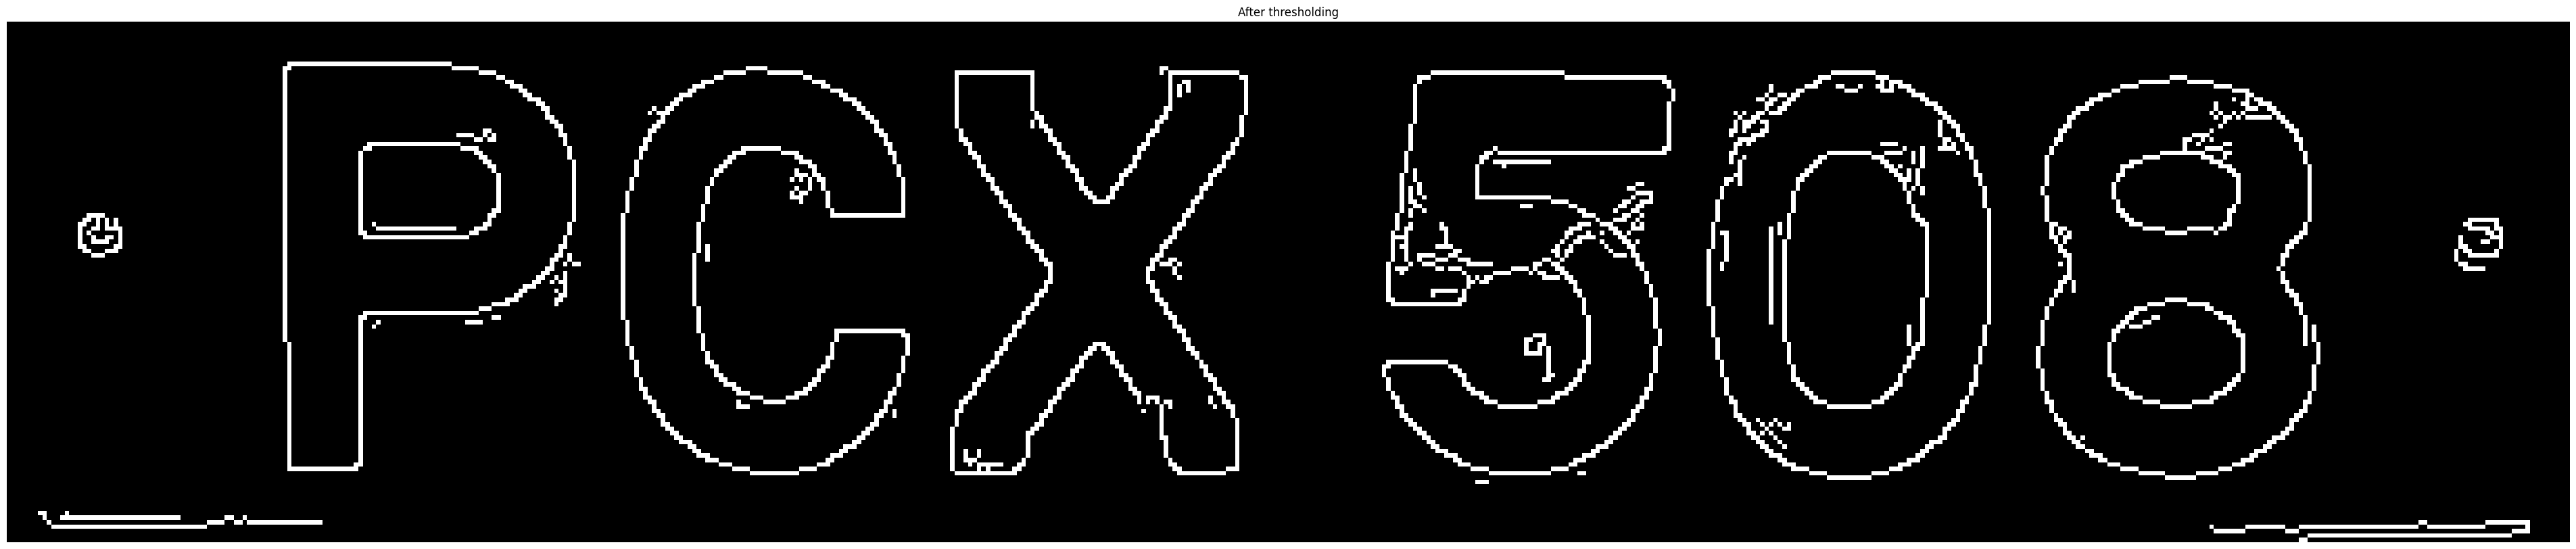

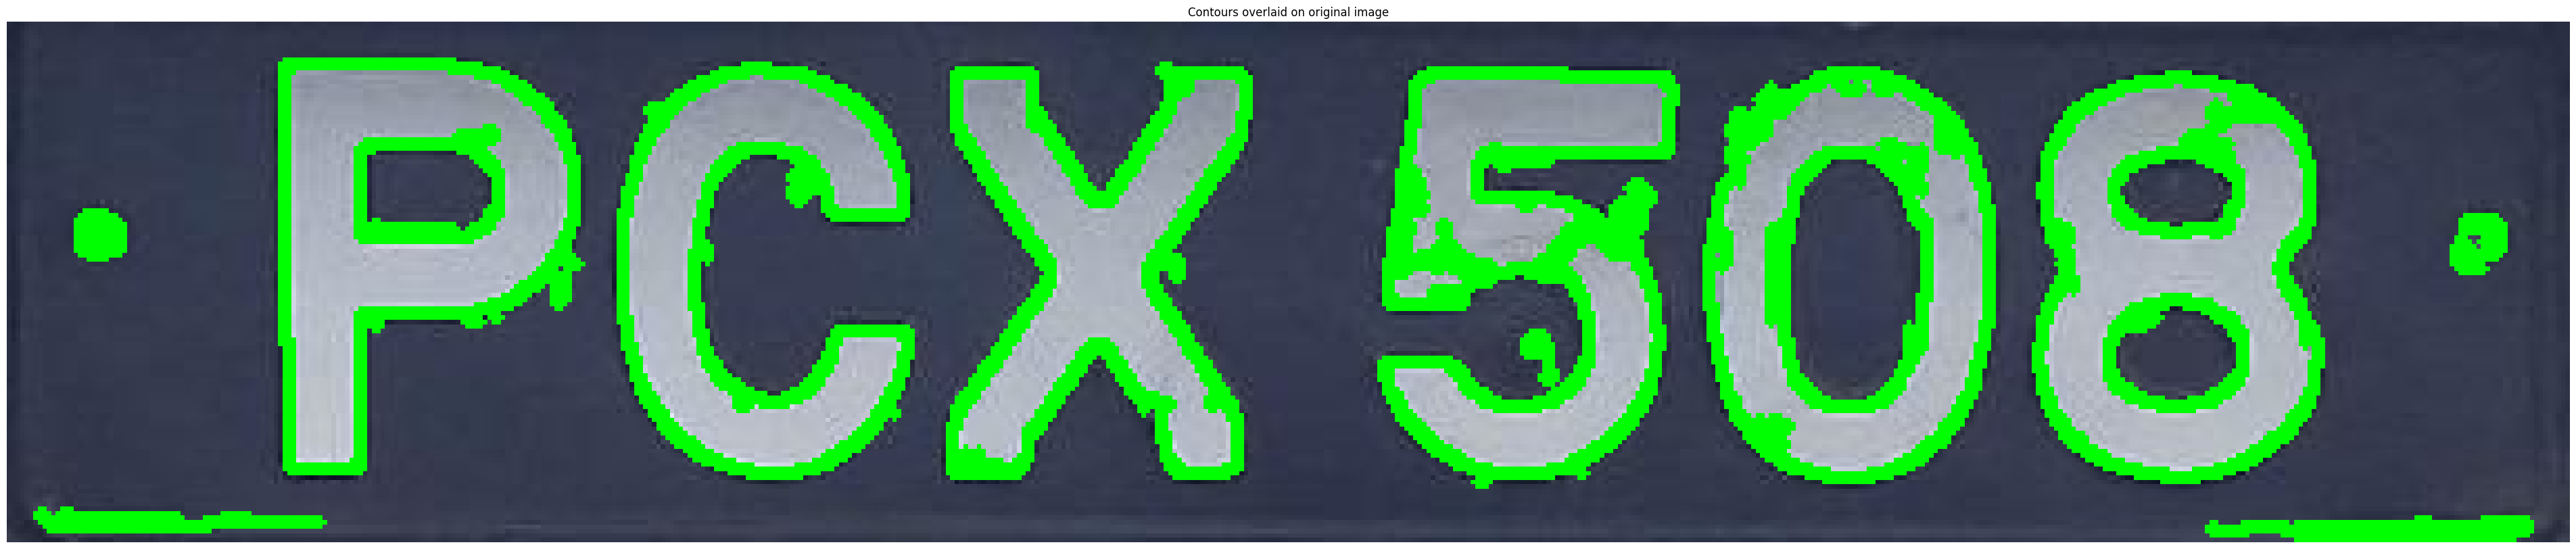

Number of Contours found = 77
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [10  7  9 -1]
  [-1 -1 -1  8]
  [11  8 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [15 12 14 -1]
  [-1 -1 -1 13]
  [16 13 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [25 21 23 -1]
  [24 -1 -1 22]
  [-1 23 -1 22]
  [27 22 26 -1]
  [-1 -1 -1 25]
  [28 25 -1 -1]
  [29 27 -1 -1]
  [31 28 30 -1]
  [-1 -1 -1 29]
  [32 29 -1 -1]
  [35 31 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [45 37 39 -1]
  [40 -1 -1 38]
  [41 39 -1 38]
  [42 40 -1 38]
  [43 41 -1 38]
  [44 42 -1 38]
  [-1 43 -1 38]
  [50 38 46 -1]
  [47 -1 -1 45]
  [48 46 -1 45]
  [49 47 -1 45]
  [-1 48 -1 45]
  [63 45 51 -1]
  [52 -1 -1 50]
  [53 51 -1 50]
  [54 52 -1 50]
  [-1 53 55 50]
  [56 -1 -1 54]
  [57 55 -1 54]
  [58 56 -1 54]
  [60 57 59 54]
  [-1 -1 -1 58]
  [61 58 -

In [11]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

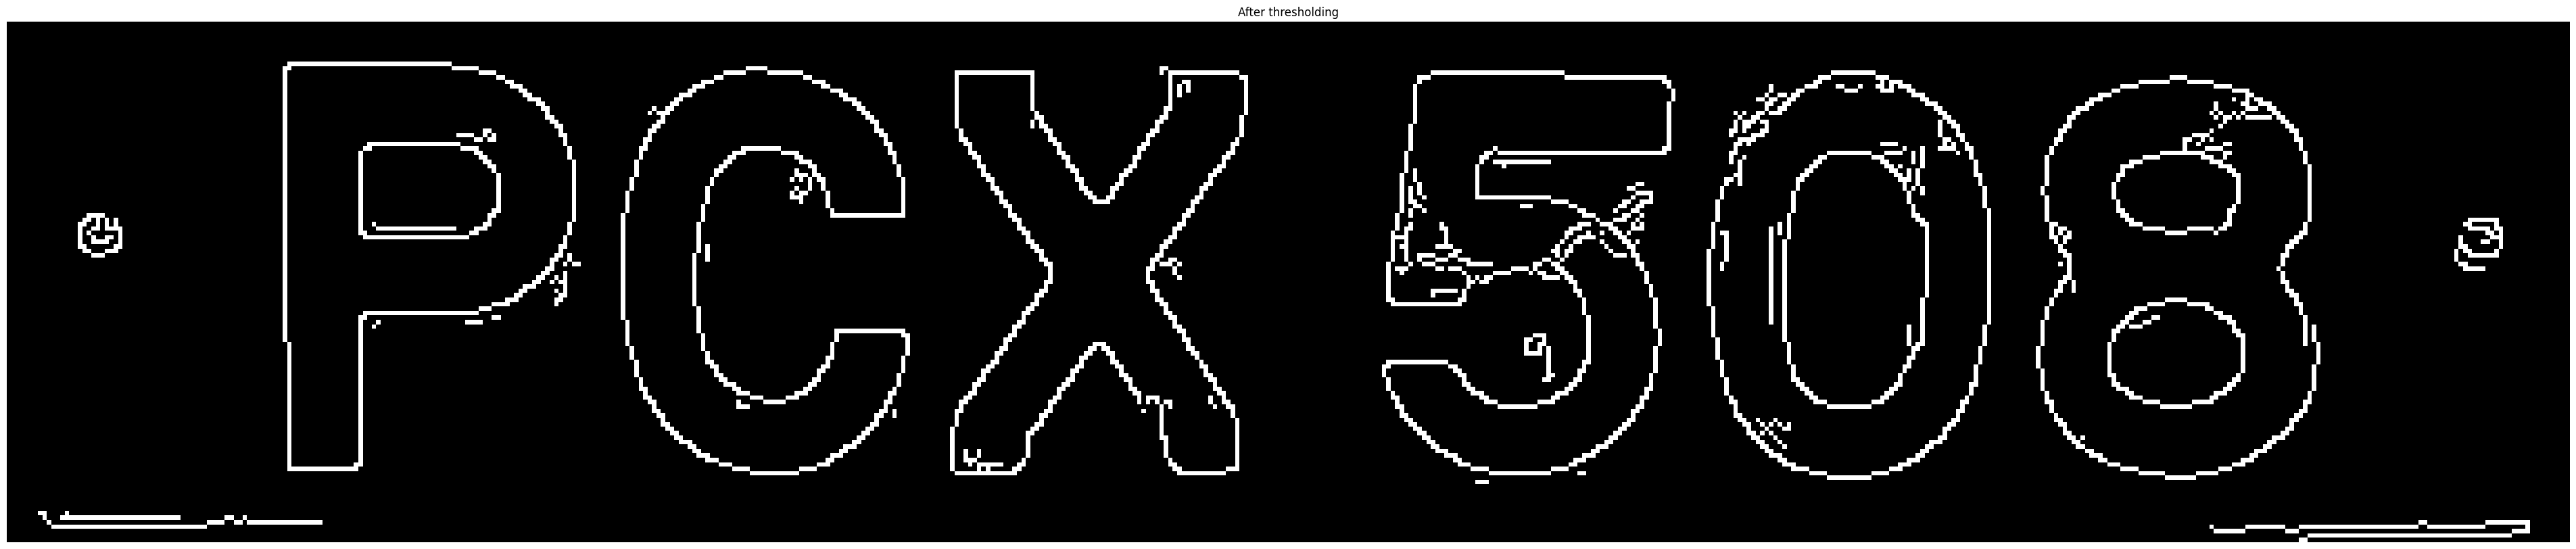

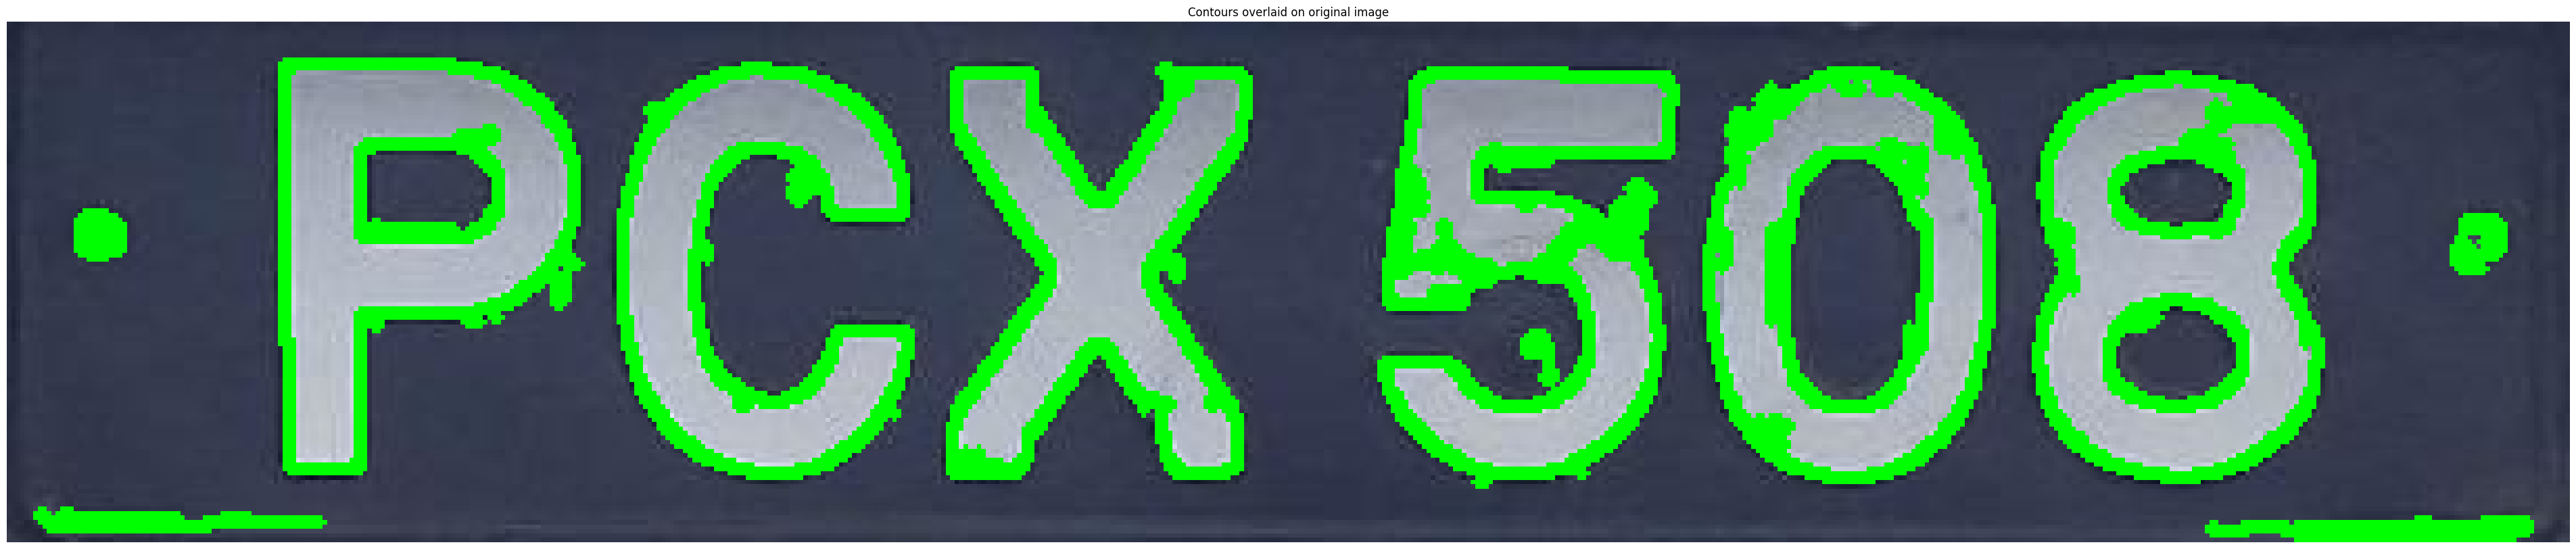

Number of Contours found = 77
246
52
127
4
2
1
2
4
31
10
6
2
2
80
90
20
1
8
6
17
42
4
66
4
13
30
43
24
4
179
145
6
99
68
11
1
10
11
518
6
4
6
4
14
7
552
4
10
4
6
461
12
4
15
487
11
10
1
55
8
4
15
12
761
4
4
378
4
344
5
276
272
90
87
36
18
4


In [12]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

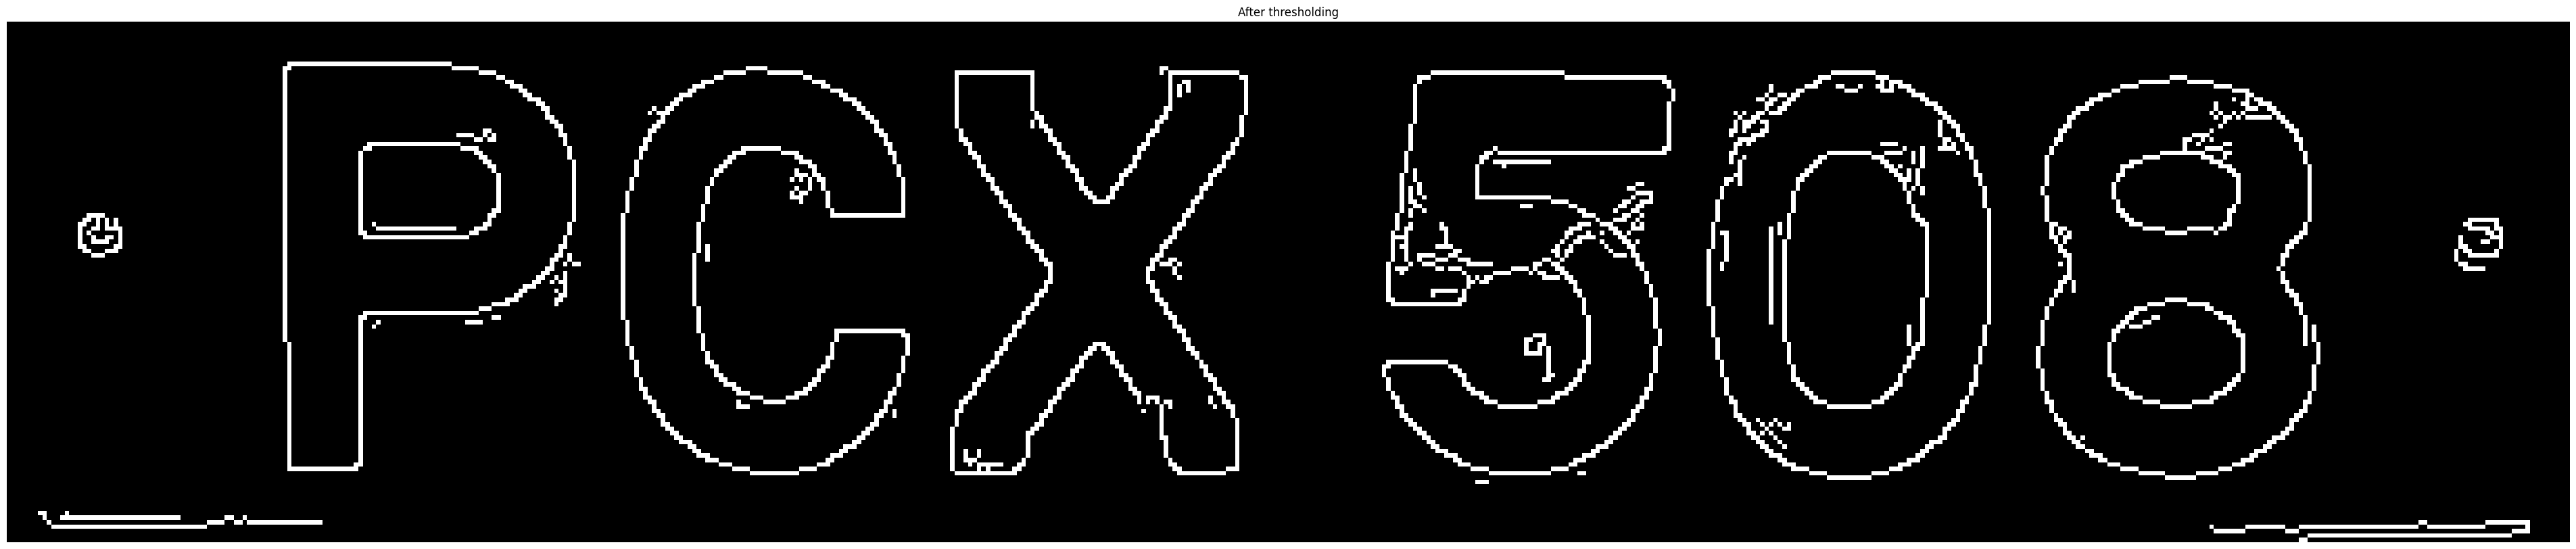

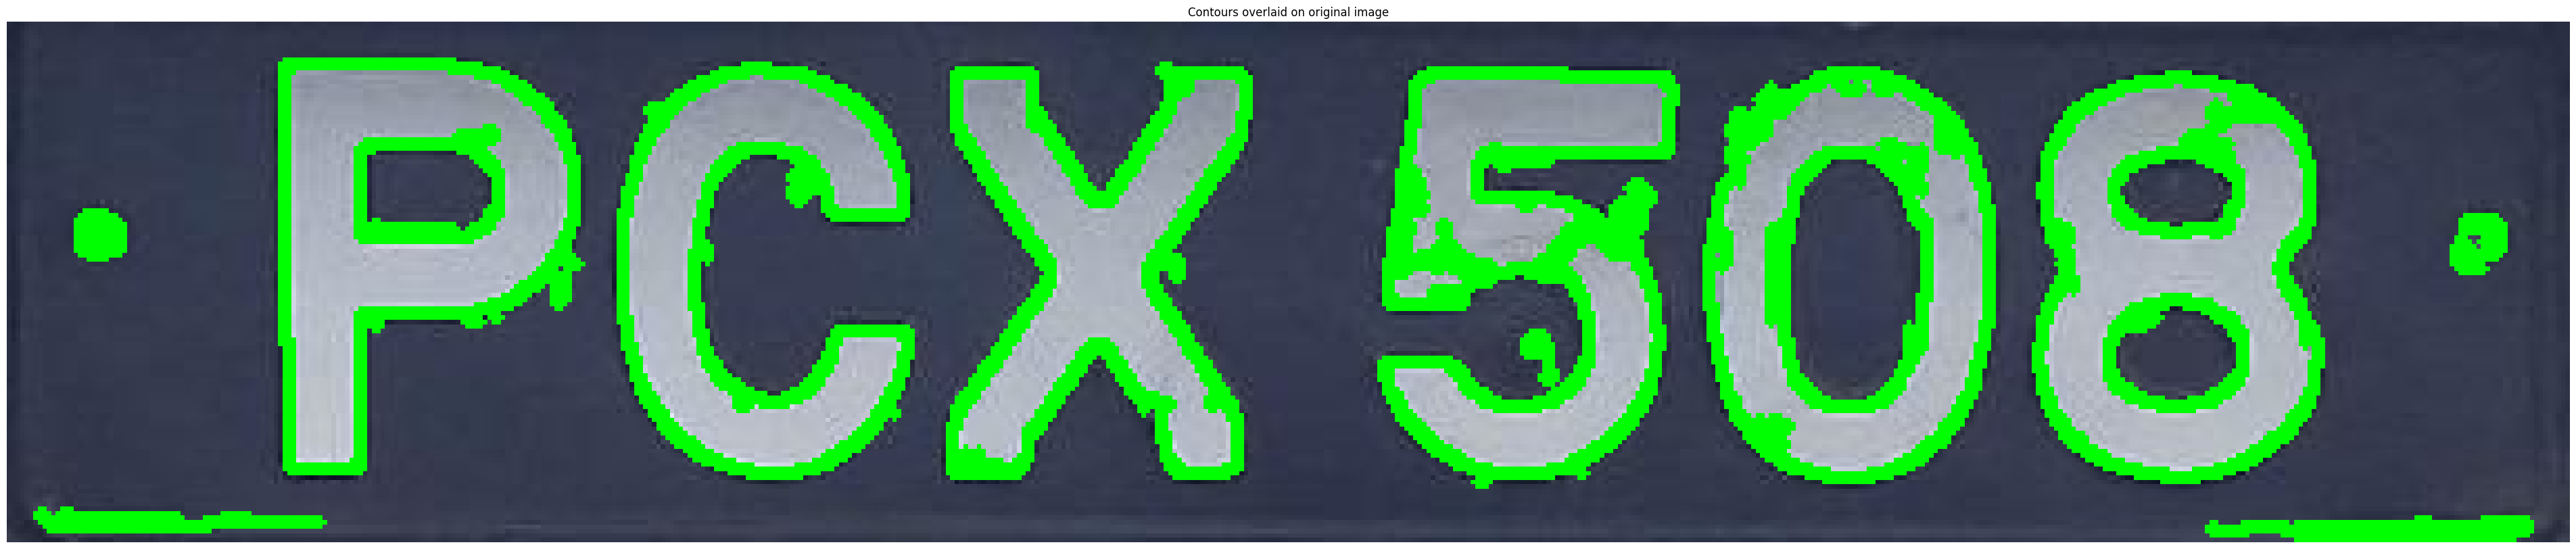

Number of Contours found = 77
41
4
24
2
2
1
2
4
16
9
2
2
2
36
47
14
1
8
2
8
2
2
34
4
8
18
27
5
2
65
44
2
60
33
9
1
8
8
277
6
4
6
4
8
6
271
4
6
4
6
175
8
4
9
188
4
4
1
35
6
2
10
8
379
4
4
179
4
156
4
49
48
18
16
4
14
4


In [13]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

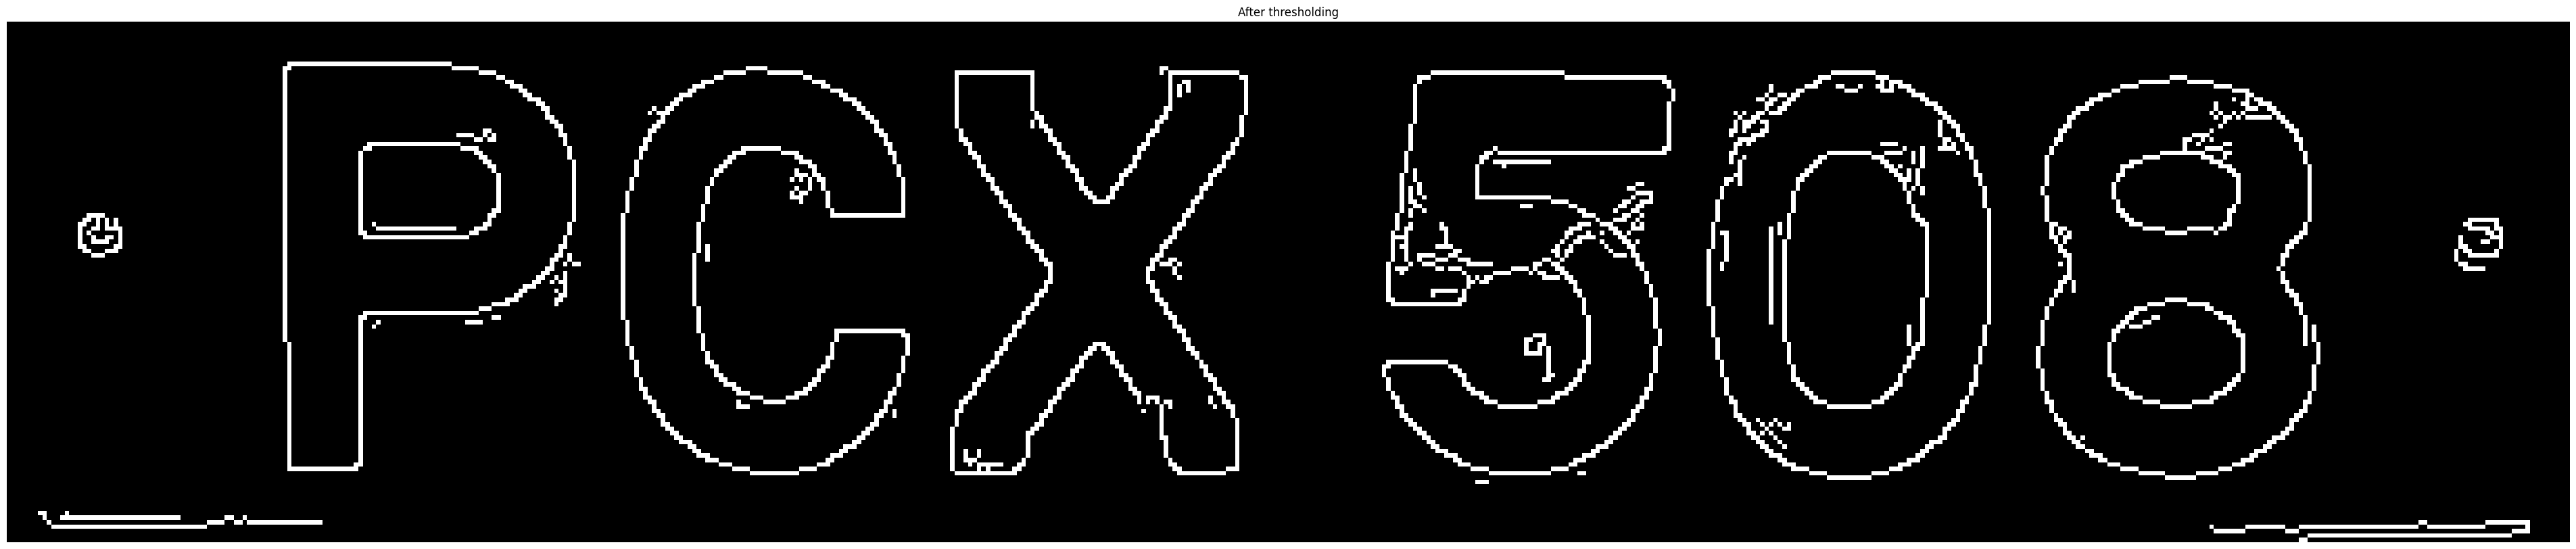

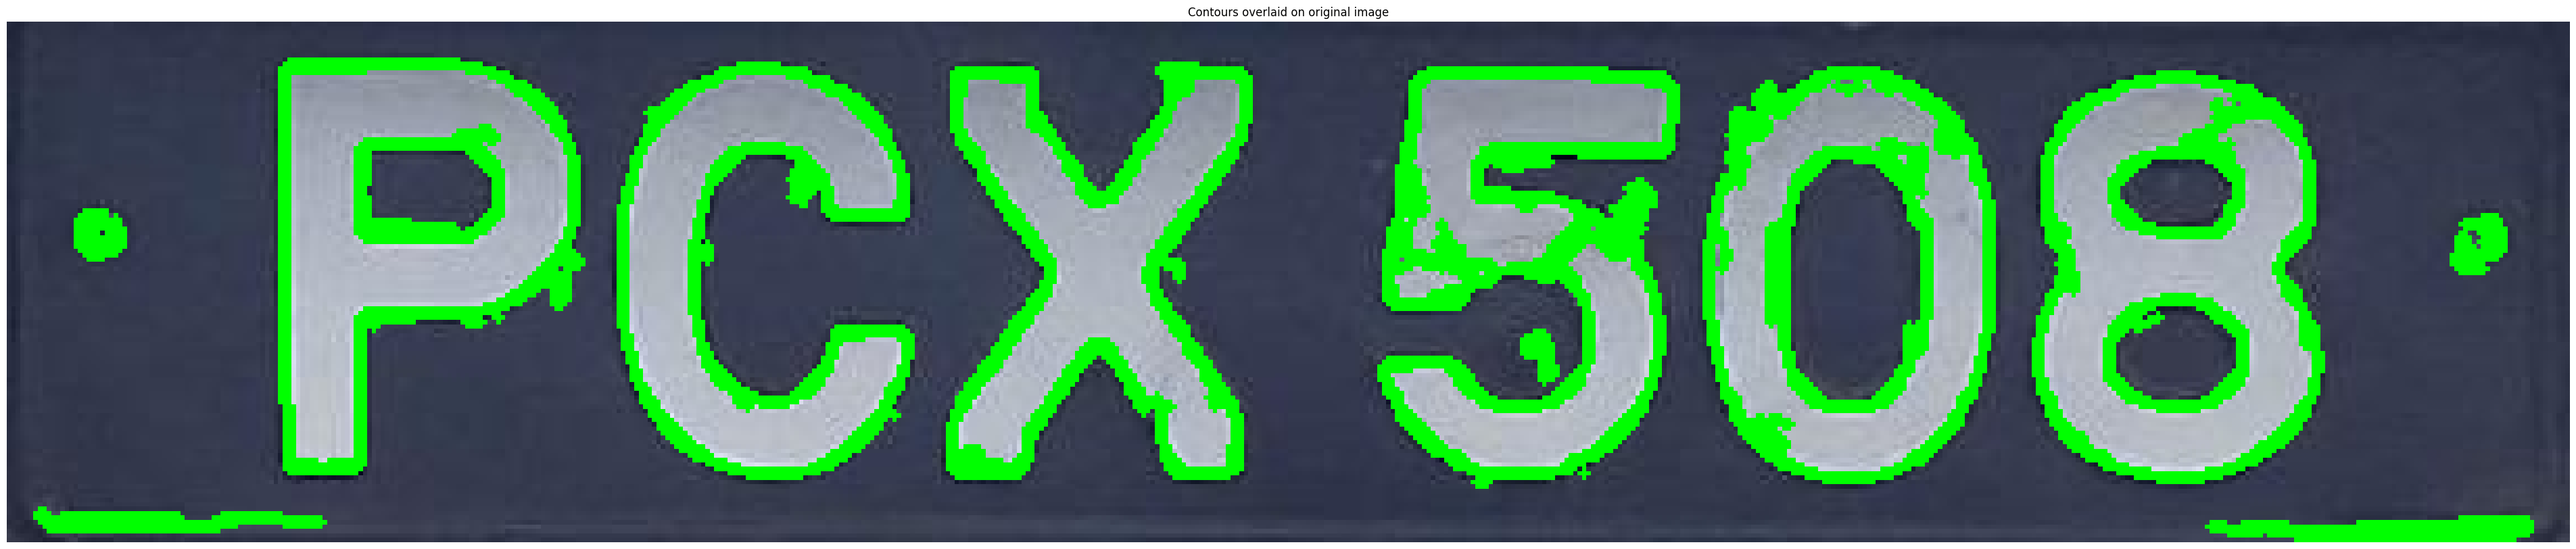

Number of Contours found = 77
23
2
10
2
1
1
1
2
9
3
2
1
1
20
28
7
1
3
2
4
2
2
20
1
2
10
17
3
2
39
26
2
32
17
2
1
4
5
138
2
1
2
1
4
3
140
1
2
1
2
90
4
1
5
103
2
4
1
19
2
2
5
4
203
1
1
93
1
76
2
26
26
10
11
2
6
1


In [14]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

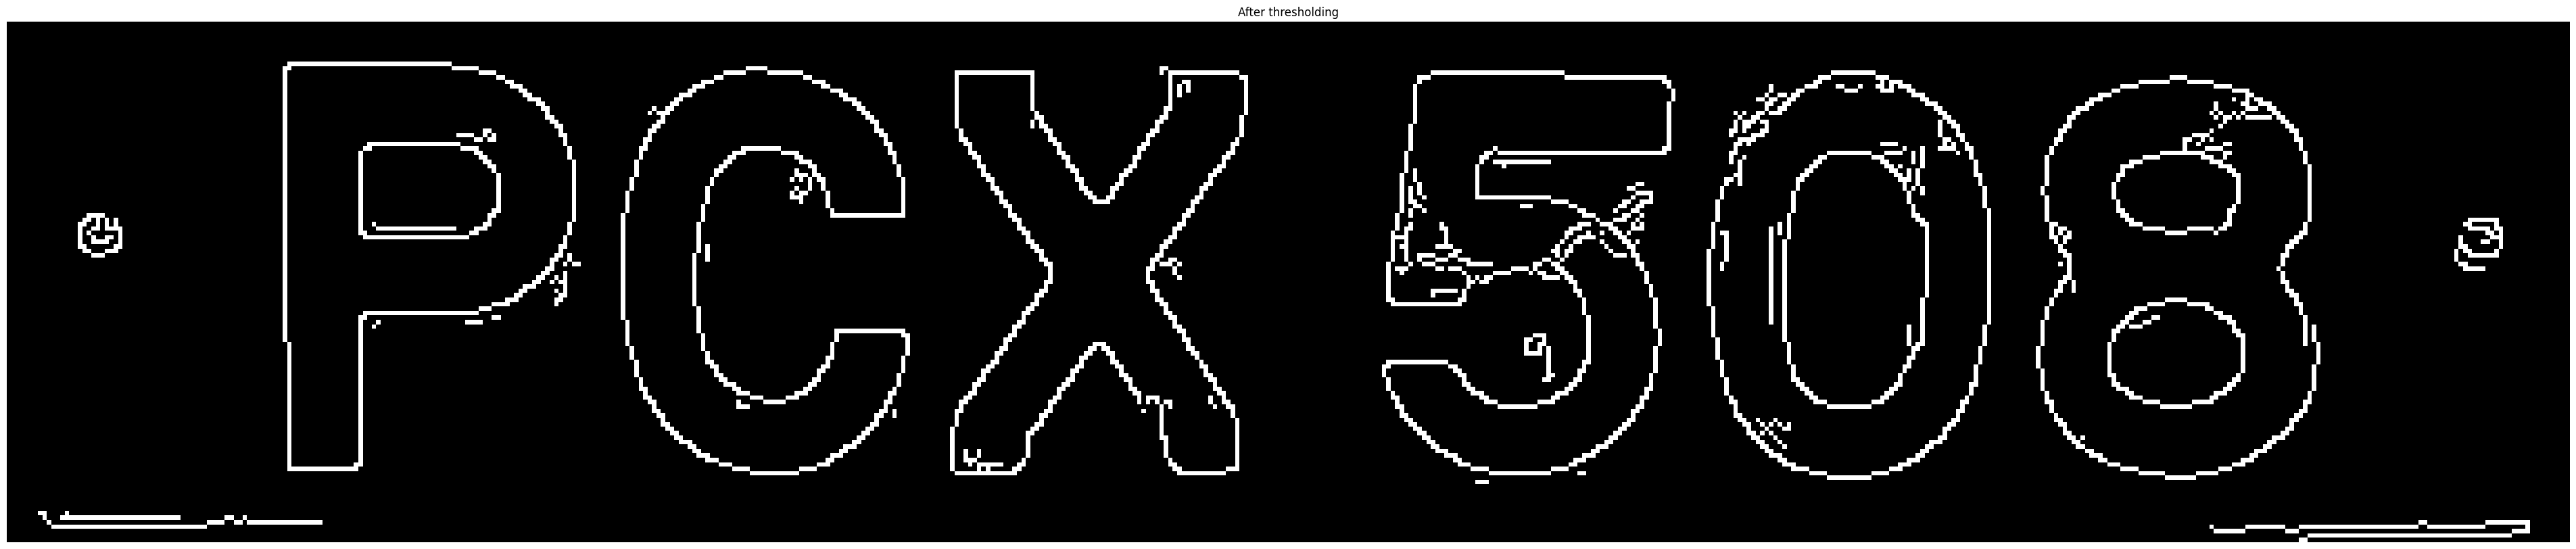

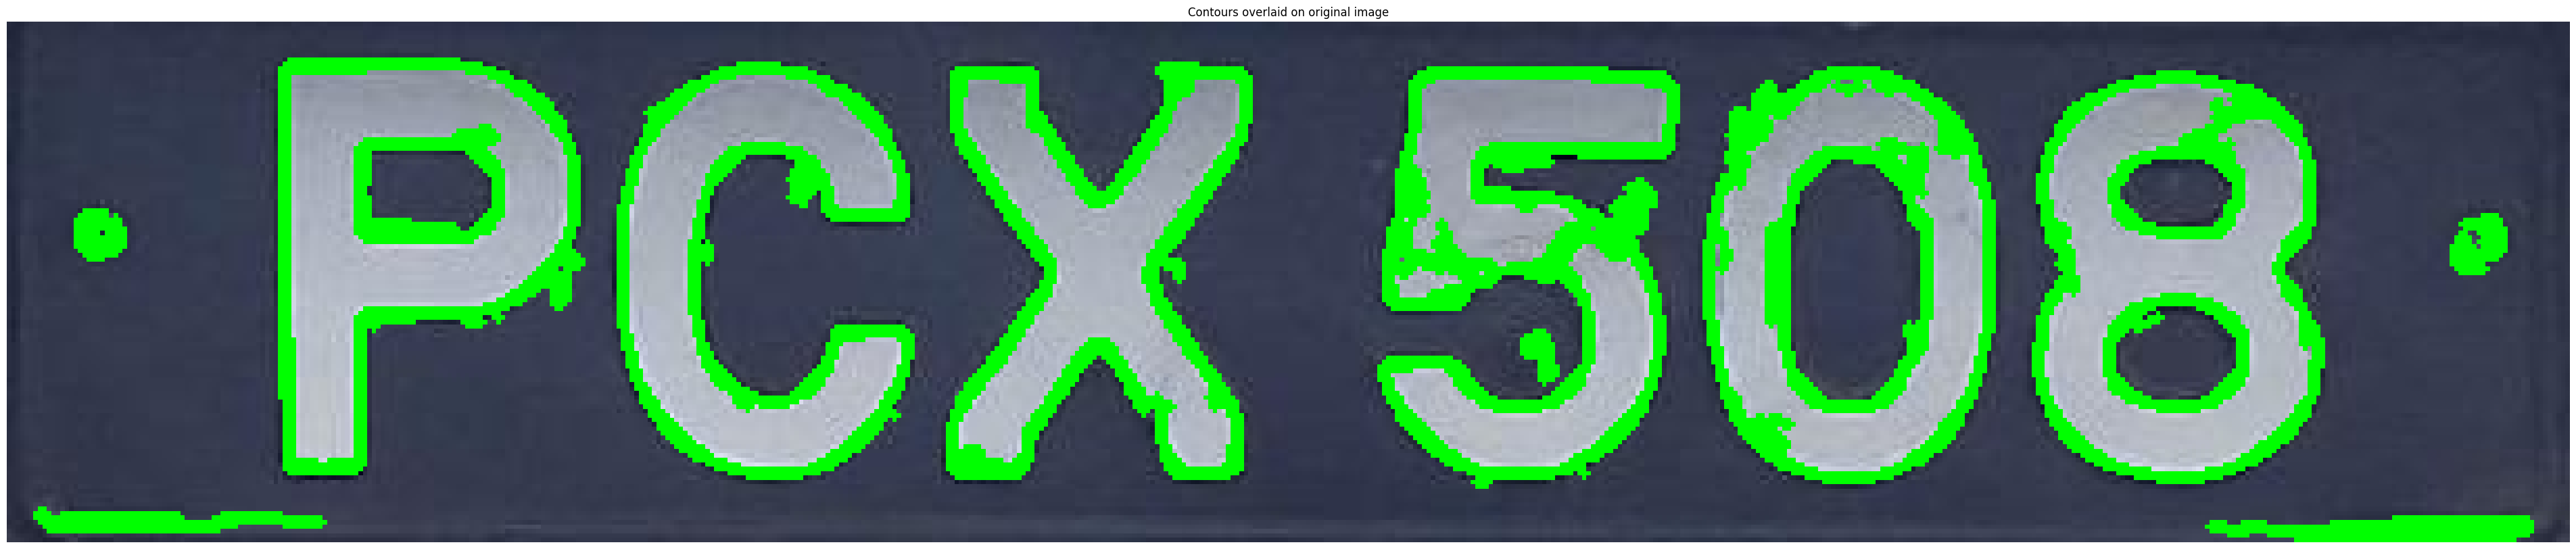

Number of Contours found = 77
22
2
10
2
1
1
1
2
10
3
2
1
1
23
28
7
1
3
2
4
2
2
21
1
2
10
17
3
2
39
25
2
32
20
2
1
4
5
146
2
1
2
1
4
3
139
1
2
1
2
91
5
1
6
103
2
4
1
17
2
2
5
6
142
1
1
92
1
77
2
28
28
13
11
2
5
1


In [15]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)

_, th2 = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))